<a href="https://colab.research.google.com/github/LaVva416/com2022/blob/main/ex01_%ED%9A%8C%EA%B7%80_%EB%8C%80%ED%95%99%EC%B7%A8%EC%97%85%EB%A5%A0%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.Uni-Variate Regression

##1) 데이터 수집

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#df = pd.read_csv('/content/drive/MyDrive/2022_전산학_colab/univ_info_small (2).csv')
df = pd.read_csv('/content/drive/MyDrive/2022_전산학_colab/univ_info_small (2).csv')

In [ ]:
# 1,2,3,4 열 중 하나라도 0인 값이 있는 행을 제거
# (전임교원/1인당/학생 수, 전임교원/확보율/ 전임교원/ 강의/ 담당/ 비율/ 취업률)
id_remove = df[(df['전임교원 1인당 학생 수']==0)|
               (df['취업률']==0) |
               (df['전임교원 강의 담당 비율']==0) |
               (df['취업률']==0)].index
print(id_remove)

Int64Index([   1,    7,   10,   26,   35,   49,   50,   51,   56,   63,
            ...
            1653, 1664, 1666, 1675, 1683, 1686, 1688, 1700, 1707, 1721],
           dtype='int64', length=221)


In [ ]:
print(df)
df2 = df.drop(id_remove, axis=0)
print(df2)

            학교명  전임교원 1인당 학생 수  전임교원 확보율  전임교원 강의 담당 비율   취업률
0      ICT폴리텍대학          18.82    106.25           72.6  74.5
1     가야대학교(고령)           0.00      0.00            0.0   0.0
2     가야대학교(김해)          33.74     64.44           79.9  76.1
3         가천대학교          20.35    101.01           67.6  66.5
4      가톨릭관동대학교          21.77     97.12           72.2  64.4
...         ...            ...       ...            ...   ...
1717      호원대학교          29.93     69.44           53.7  73.9
1718      홍익대학교          27.90     74.34           72.3  62.1
1719      홍익대학교          26.86     78.00           73.1  64.8
1720   화성의과학대학교          28.94     72.34           74.9  62.8
1721   화신사이버대학교         154.44    128.57           61.5   0.0

[1722 rows x 5 columns]
            학교명  전임교원 1인당 학생 수  전임교원 확보율  전임교원 강의 담당 비율   취업률
0      ICT폴리텍대학          18.82    106.25           72.6  74.5
2     가야대학교(김해)          33.74     64.44           79.9  76.1
3         가천대학교          20.35    101.01     

In [ ]:
#numpy 배열로 변환
df_np = df2.to_numpy()
print(df_np)

[['ICT폴리텍대학' 18.82 106.25 72.6 74.5]
 ['가야대학교(김해)' 33.74 64.44 79.9 76.1]
 ['가천대학교' 20.35 101.01 67.6 66.5]
 ...
 ['홍익대학교' 27.9 74.34 72.3 62.1]
 ['홍익대학교' 26.86 78.0 73.1 64.8]
 ['화성의과학대학교' 28.94 72.34 74.9 62.8]]


##2) 특징 추출

In [ ]:
x = df_np [:, 3]  # 전임교원 강의 담당 비율
y = df_np [:, -1]   # 취업률
m = len(df_np)  # 행 개수

In [ ]:
print(x.shape)
x = x.reshape(m, 1)
print(x.shape)

(1501,)
(1501, 1)


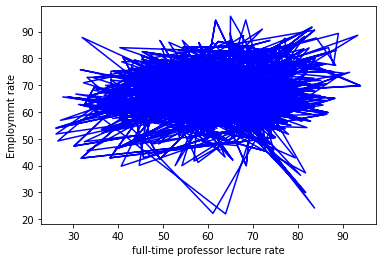

In [ ]:
plt.plot(x, y, 'b')
plt.xlabel("full-time professor lecture rate")
plt.ylabel("Employmrnt rate")
plt.show()

(1501, 1) (1501,)


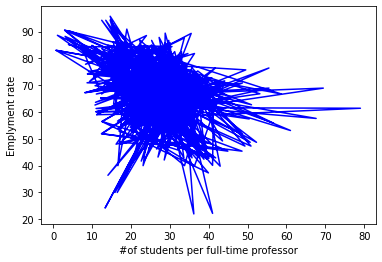

In [ ]:
x = df_np[:, 1]
y = df_np[:, -1]
m = len(df_np)  #행 개수

x = x.reshape(m, 1)
print(x.shape, y.shape)

plt.plot(x, y, 'b')
plt.xlabel("#of students per full-time professor") #전임교원 1인당 학생 수(명)
plt.ylabel("Emplyment rate")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.1)

In [ ]:
len(x), len(train_x), len(test_x), len(train_y), len(test_y)

(1501, 1350, 151, 1350, 151)

##3) 모델 설계, loss함수 결정, 훈련

In [ ]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(train_x, train_y)

LinearRegression()

In [ ]:
coef = regressor.coef_  # theta1
intercept = regressor.intercept_# theta()
print('coef= ', coef)
print('intercept= ', intercept)

coef=  [-0.24181582]
intercept=  73.75591838319015


##4) 임의의 전임교원 강의 담당 비율(%)에 대한 취업률 예측하기

In [ ]:
#어떤 대학교 전임교원 1인당 학생 수(명)가 70명, 20명 이라면, 취업률은 얼마일까?
regressor.predict([[70], [20]])

array([56.82881076, 68.91960192])

##5) 회귀선으로 그리기

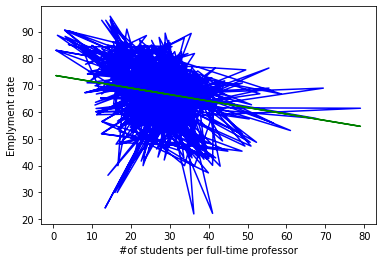

In [ ]:
plt.plot(x, y, 'b')
plt.plot(x, regressor.predict(x.reshape(m, 1)), color='green', label='Linear Regression')
plt.xlabel("#of students per full-time professor") #전임교원 1인당 학생 수(명)
plt.ylabel("Emplyment rate")  # 취업률(%)
plt.show()

In [ ]:
train_pred = regressor.predict(train_x)
test_pred = regressor.predict(test_x)
print(train_pred, test_pred)

[65.91383124 66.19191943 63.29254772 ... 68.61733214 65.69136068
 66.57398844] [65.33589142 66.4022992  69.26781671 64.86676872 67.65006885 66.7263324
 66.65862397 66.21610102 67.69843201 65.11342086 65.83403202 66.1532289
 65.71796042 67.73712254 67.81450361 66.13388364 65.84612281 66.98023902
 65.67443357 63.62867171 67.79515834 65.50274434 66.56915212 69.1058001
 65.78325069 68.73824005 70.49140477 65.50032618 69.4419241  70.78883823
 70.30037027 66.78678636 64.2719018  70.73322059 65.97186704 65.12551165
 66.94880296 67.85077598 67.1664372  68.36342553 65.85579544 65.86546807
 66.37811762 66.98507533 68.37068    65.72037858 66.65378766 65.04571243
 66.35151788 65.33830958 67.89188467 65.21014719 65.76874174 67.2825088
 69.72484861 68.19415445 66.16048338 67.18336431 65.99363046 66.74325951
 67.04552929 65.9452673  66.05166626 65.7542328  68.61007767 67.41308934
 67.29218143 72.80316404 66.97298454 66.09761126 66.39262657 69.48061463
 66.33942709 66.55464317 64.23079311 66.22093733 

In [ ]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(train_pred, train_y)
test_mse = mean_squared_error(test_pred, test_y)
print(train_mse, test_mse)

85.42879877819736 71.57673287615802
